<a href="https://colab.research.google.com/github/PiyushGithub24/Machine_Learning_Algorithms/blob/main/Multiple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing some libraries

In [220]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [221]:
#read the csv data to DataFrame
df_index=pd.read_csv('/content/Economic_Price_Index.csv')

In [222]:
df_index.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2018,12,3.25,4.9,1821
1,1,2018,11,3.25,5.0,1778
2,2,2018,10,3.25,5.3,1728
3,3,2018,9,3.25,5.0,1724
4,4,2018,8,3.00,5.2,1656


In [223]:
#drop the unnecessary columns
df_index.drop(columns=['Unnamed: 0','year',	'month'],axis=1 ,inplace=True)

In [224]:
df_index.head()

,interest_rate,unemployment_rate,index_price
0,3.25,4.9,1821
1,3.25,5.0,1778
2,3.25,5.3,1728
3,3.25,5.0,1724
4,3.00,5.2,1656


In [225]:
df_index.size

108

In [226]:
df_index.shape

(36, 3)

In [227]:
#check the null values in our dataframe
df_index.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

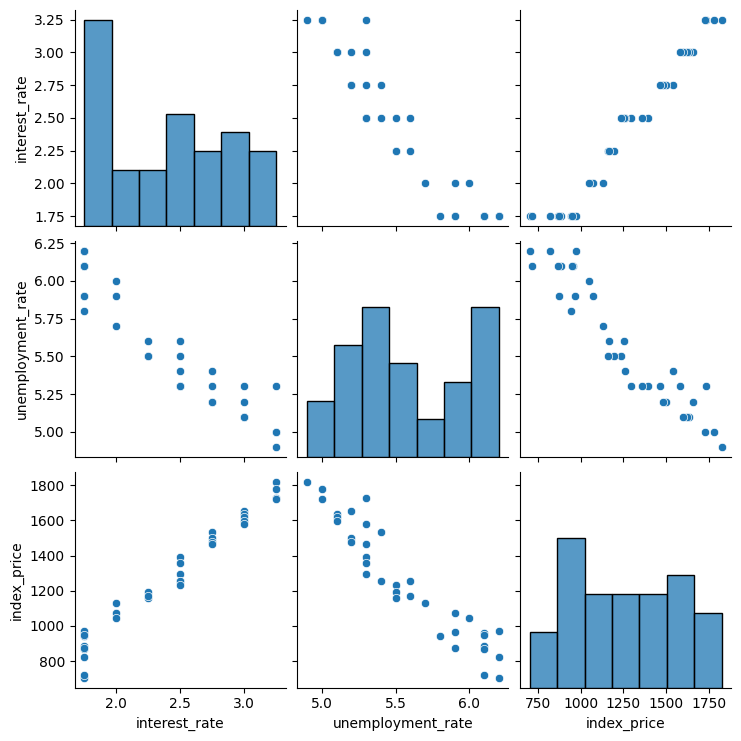

In [228]:
#visualizing the data
sns.pairplot(df_index)

In [229]:
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.944387,0.980518
unemployment_rate,-0.944387,1.000000,-0.946689
index_price,0.980518,-0.946689,1.000000


Text(0, 0.5, 'unemployment_rate')

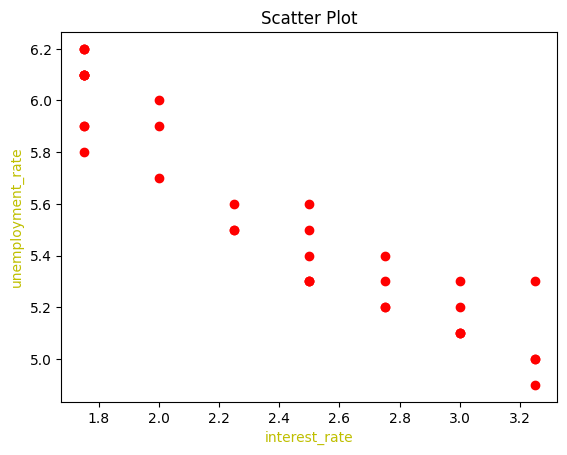

In [230]:
#plotting the scatter plot b/w the two independent variables
plt.scatter(df_index['interest_rate'],df_index['unemployment_rate'],color='red')
plt.title('Scatter Plot')
plt.xlabel('interest_rate',color='y')
plt.ylabel('unemployment_rate',color='y')

In [231]:
#seperating the dependent and independents variables
x=df_index[['interest_rate','unemployment_rate']]
y=df_index['index_price']

In [232]:
x.head()

,interest_rate,unemployment_rate
0,3.25,4.9
1,3.25,5.0
2,3.25,5.3
3,3.25,5.0
4,3.00,5.2


In [233]:
y.head()

0    1821
1    1778
2    1728
3    1724
4    1656
Name: index_price, dtype: int64

In [234]:
#or we can also perform seperation of dependent and independent features  in this way
x=df_index.iloc[:,:-1]
y=df_index.iloc[:,-1]

In [235]:
x.head()

,interest_rate,unemployment_rate
0,3.25,4.9
1,3.25,5.0
2,3.25,5.3
3,3.25,5.0
4,3.00,5.2


In [236]:
y.head()

0    1821
1    1778
2    1728
3    1724
4    1656
Name: index_price, dtype: int64

In [237]:
#train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [238]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(27, 2) (9, 2) (27,) (9,)


<Axes: xlabel='interest_rate', ylabel='index_price'>

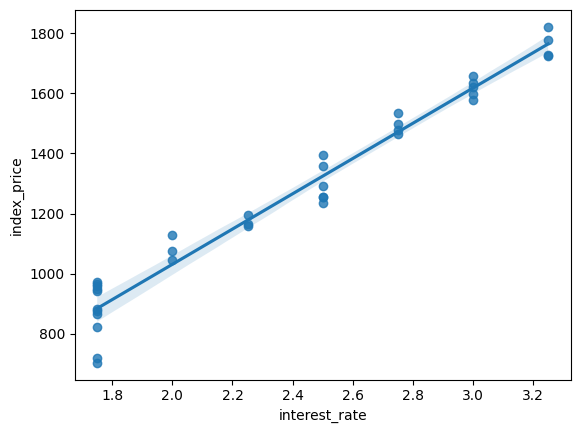

In [239]:
#plotting regression plot using seaborn library
#sns.regplot(df_index['interest_rate'],df_index['index_price'])
sns.regplot(x=df_index['interest_rate'], y=df_index['index_price'])

<Axes: xlabel='unemployment_rate', ylabel='index_price'>

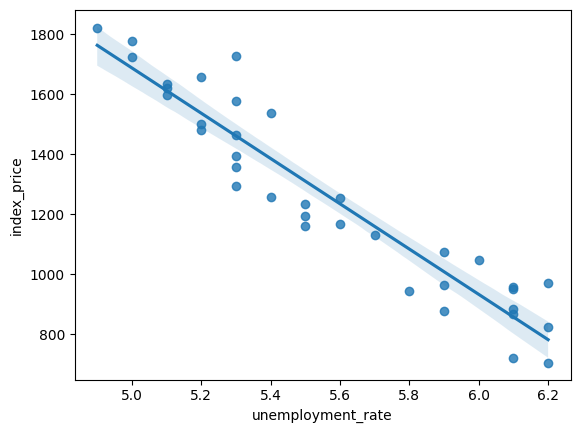

In [240]:
sns.regplot(x=df_index['unemployment_rate'],y=df_index['index_price'])

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

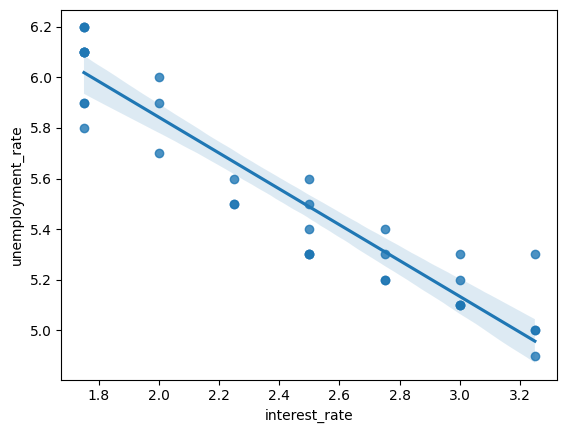

In [241]:
sns.regplot(x=df_index['interest_rate'],y=df_index['unemployment_rate'])

In [242]:
#importing the standardscaler function for datastandardization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [243]:
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [244]:
x_train

array([[ 0.10101525,  0.16012815],
       [ 0.5555839 , -0.32025631],
       [-1.26269068,  1.60128154],
       [ 1.46472119, -1.52121746],
       [ 1.01015254, -0.80064077],
       [-1.26269068,  1.36108931],
       [ 0.10101525, -0.56044854],
       [-0.35355339, -0.08006408],
       [ 1.01015254, -1.040833  ],
       [ 0.5555839 , -0.80064077],
       [ 1.46472119, -1.28102523],
       [-0.80812204,  1.12089708],
       [ 1.46472119, -0.56044854],
       [-1.26269068,  1.60128154],
       [ 1.46472119, -1.28102523],
       [-1.26269068,  0.88070485],
       [-0.80812204,  0.88070485],
       [-1.26269068,  1.36108931],
       [ 0.5555839 , -0.80064077],
       [-0.80812204,  0.40032038],
       [ 0.10101525, -0.08006408],
       [-1.26269068,  0.88070485],
       [ 1.01015254, -1.040833  ],
       [-0.35355339, -0.08006408],
       [ 1.01015254, -1.040833  ],
       [ 0.10101525, -0.56044854],
       [-1.26269068,  1.60128154]])

In [245]:
x_test

array([[-1.26269068,  1.36108931],
       [ 0.10101525, -0.56044854],
       [-1.26269068,  0.64051262],
       [-1.26269068,  1.36108931],
       [ 0.10101525, -0.32025631],
       [-1.26269068,  1.36108931],
       [-0.35355339,  0.16012815],
       [ 0.5555839 , -0.56044854],
       [ 1.01015254, -0.56044854]])

In [246]:
#importing the Linear Regression function
from sklearn.linear_model import LinearRegression
regression=LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

#Cross validation score using the scoring="neg_mean_squared_error"

In [247]:
from sklearn.metrics import mean_squared_error

In [248]:
##cross validation
from sklearn.model_selection import cross_val_score
validation_score=cross_val_score(regression,x_train,y_train,scoring="neg_mean_squared_error",cv=3)

In [249]:
validation_score

array([-7234.23370413, -1548.59260876, -4107.94289218])

In [250]:
np.mean(validation_score)

-4296.923068358244

#Cross validation accuracy

In [251]:
validation_accuracy=cross_val_score(regression,x_train,y_train,cv=3)
validation_accuracy

array([0.93763831, 0.9889237 , 0.92672504])

In [252]:
#validation accuracy in %
print('Validation Accuracy=',round(np.mean(validation_accuracy),4)*100,'%')

Validation Accuracy= 95.11 %


In [253]:
#prediction of test data
y_pred=regression.predict(x_test)

In [254]:
y_pred

array([ 889.02652121, 1353.55483751,  924.4472008 ,  889.02652121,
       1341.74794432,  889.02652121, 1194.77643435, 1476.91256109,
       1600.27028467])

#Performane metrics:--

In [255]:
from sklearn.metrics import mean_squared_error , mean_absolute_error
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print("mean_squared_error: ",mse)  # mse is most affected by outliers
print("mean_absolute_error: ",mae)
print("root_mean_squared_error: ",rmse)

mean_squared_error:  4470.162456327526
mean_absolute_error:  45.087194414204305
root_mean_squared_error:  66.85927352527492


#R-Squared :--

In [256]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print("R-squared =",score)

R-squared = 0.945051714043995


#Adjusted R-Squared:--

In [257]:
len(x_test)

9

In [258]:
a_r2_score=1-(((1-float(score))*(len(x_test)-1))/(len(x_test)-x_test.shape[1]-1))
print("Adjusted_R-squared =",a_r2_score)

Adjusted_R-squared = 0.9267356187253267


#Assumptions :--

Text(0, 0.5, 'y_pred -->')

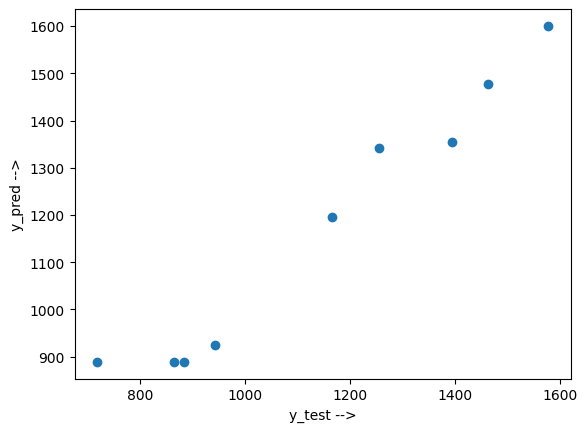

In [259]:
plt.scatter(y_test,y_pred)    #since there is linear relationship so our model is good
plt.xlabel('y_test -->')
plt.ylabel('y_pred -->')

In [260]:
#print residuals
residuals=y_test-y_pred
print(residuals)

35   -170.026521
13     40.445162
26     18.552799
30     -5.026521
16    -85.747944
31    -23.026521
21    -27.776434
12    -12.912561
8     -22.270285
Name: index_price, dtype: float64


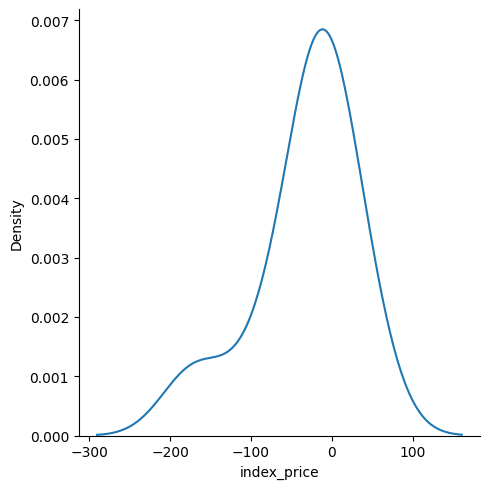

In [261]:
#plotting the residuald
sns.displot(residuals,kind='kde')

In [262]:
#pl

Text(0, 0.5, 'residuals -->')

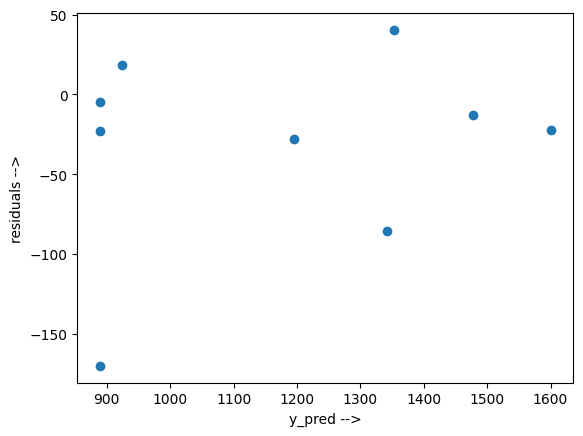

In [263]:
#plotting the scatter plot b/w y_pred and residuals
plt.scatter(y_pred,residuals)
plt.xlabel('y_pred -->')
plt.ylabel('residuals -->')   #here in the below graph we can see that data is uniformally distributed

#Linear Regression using OLS :--

In [264]:
import statsmodels.api as sm
model=sm.OLS(y_train,x_train).fit()

In [265]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.057
Model:                            OLS   Adj. R-squared (uncentered):             -0.019
Method:                 Least Squares   F-statistic:                             0.7494
Date:                Sat, 27 Apr 2024   Prob (F-statistic):                       0.483
Time:                        11:59:26   Log-Likelihood:                         -231.90
No. Observations:                  27   AIC:                                      467.8
Df Residuals:                      25   BIC:                                      470.4
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           271.3731    803.889      0.338      0.739   -1384.266    1927.013
x2           -49.1560    803.889     -0.061      0.952   -1704.796    1606.484
==============================================================================
Omnibus:                        5.626   Durbin-Watson:                   0.005
Prob(Omnibus):                  0.060   Jarque-Bera (JB):                3.766
Skew:                          -0.818   Prob(JB):                        0.152
Kurtosis:                       3.819   Cond. No.                         6.02
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [266]:
#printing the coefficients
print(regression.coef_)

[271.37314665 -49.15601626]


In [267]:
#from both the method we are getting the same coefficients